In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import scipy

In [3]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = scipy.stats.multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [4]:
data = pd.read_excel('data_v7.xlsx')


data.drop(['Unnamed: 0','locations_month','label','date'],axis=1,inplace=True)

data.drop(['pressureInches','visibility'],axis=1,inplace=True)


loc_lst = list(data['locations'].unique())

i = 0
for haha in loc_lst:
    
    data.loc[data.locations == haha, 'locations'] = i
    i+=1


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)


# 8 features

pca = PCA(n_components=8)
data_pca = pca.fit_transform(data_rescaled)

In [5]:
labels = pd.read_excel('data_v7.xlsx',usecols=['label'])

data = pd.DataFrame(data_pca,columns=['c1','c2','c3','c4','c5','c6','c7','c8'])

In [48]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_recall = 0
    best_precision = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (1.0527717316e-1,1.0527717316e-2,.1052771731e-3,1.01277173e+0,1.0017717316e+1)
    #epsilons = np.asarray(epsilons)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

In [49]:
X = data.copy()
y = labels.copy()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [51]:
v_features = X_train.iloc[:,0:7].columns

In [52]:
import matplotlib.gridspec as gsp
import seaborn as sns

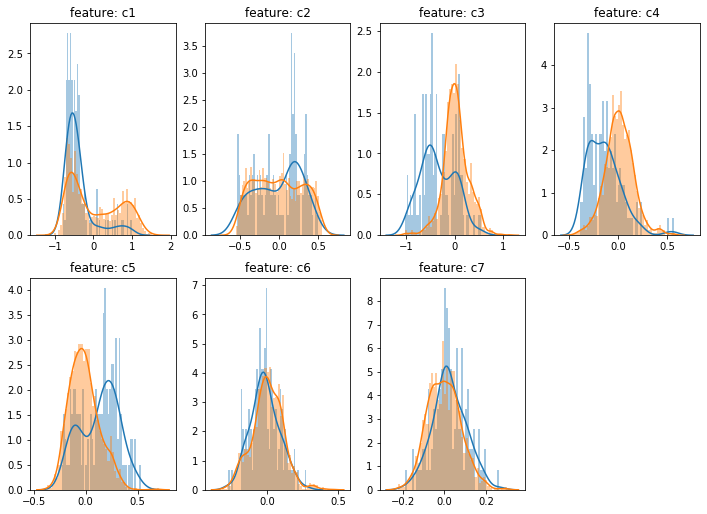

In [53]:
plt.figure(figsize=(12,8*4))
gs = gsp.GridSpec(7, 4)
for i, cn in enumerate(X_train[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[cn][y_train.label == 1], bins=50)
    sns.distplot(X_train[cn][y_train.label == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [54]:
X_train['Class'] = y_train['label']

c:\users\alvir\deelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
X_train.Class.unique()

array([0, 1], dtype=int64)

In [56]:
train_strip_v1 = X_train[X_train["Class"] == 1]
train_strip_v0 = X_train[X_train["Class"] == 0]

In [57]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)


print(train_fraud.columns.values)
print(train_cv.columns.values)
print(train_test.columns.values)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'Class']
['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'Class']
['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8' 'Class']


In [58]:
mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

In [59]:
from sklearn.metrics import f1_score,recall_score,precision_score

For below Epsilon
0.10527717316
F1 score , Recall and Precision are as below
Best F1 Score 0.550459
Best Recall Score 0.461538
Best Precision Score 0.681818
----------------------------------------
For below Epsilon
0.010527717316
F1 score , Recall and Precision are as below
Best F1 Score 0.520000
Best Recall Score 0.400000
Best Precision Score 0.742857
----------------------------------------
For below Epsilon
0.0001052771731
F1 score , Recall and Precision are as below
Best F1 Score 0.309524
Best Recall Score 0.200000
Best Precision Score 0.684211
----------------------------------------
For below Epsilon
1.01277173
F1 score , Recall and Precision are as below
Best F1 Score 0.603175
Best Recall Score 0.584615
Best Precision Score 0.622951
----------------------------------------
For below Epsilon
10.017717316
F1 score , Recall and Precision are as below
Best F1 Score 0.463158
Best Recall Score 0.676923
Best Precision Score 0.352000
----------------------------------------


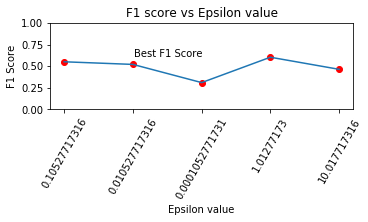

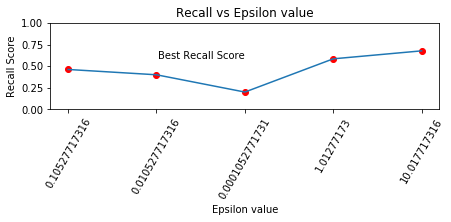

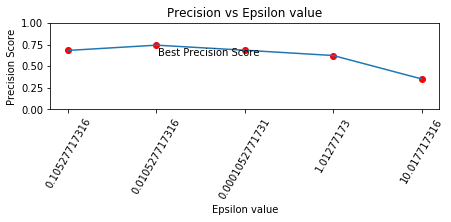

In [60]:
fscore, ep= selectThresholdByCV(p_cv,train_cv_y)

In [61]:
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.553846
Best Recall Score 0.562500
Best Precision Score 0.545455
